# Análisis y gestión de nulos de las columnas numéricas

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from src import sp_visualizacion as vis
from src import sp_analisis as an

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [2]:
# Leemos el archivo de datos limpio manteniendo el formato de fecha en las columnas date y dt_customer
df = pd.read_csv("../data/data-clean.csv", parse_dates=['date', 'dt_customer'])
df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,date,id,dt_customer,numwebvisitsmonth,contact_year,contact_month,customer_year,customer_month,subscribed,duration_min,have_children,income_type
0,NaN,housemaid,married,basic.4y,no,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,4.8570,5191,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,2012-04-04,29,2019.0000,8.0000,2012,4,no,4.3500,yes,superior
1,57.0000,services,married,high.school,unkown,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,NaN,5191,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,2012-12-30,7,2016.0000,9.0000,2012,12,no,2.4800,yes,high
2,37.0000,services,married,high.school,no,yes,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,4.8570,5191,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012-02-02,5,2019.0000,2.0000,2012,2,no,3.7700,yes,superior
3,40.0000,admin.,married,basic.6y,no,no,no,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,NaN,5191,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,2012-12-21,29,2015.0000,11.0000,2012,12,no,2.5200,yes,high
4,56.0000,services,married,high.school,no,no,yes,telephone,1,-1,0,nonexistent,1.1000,93.9940,-36,NaN,5191,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012-06-20,20,2017.0000,1.0000,2012,6,no,5.1200,yes,low


In [3]:
#Seleccionamos las columnas numéricas
col_num = df.select_dtypes(include=np.number).columns.tolist()

## Análisis de las columnas numéricas

In [4]:
df[col_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
campaign,43000.0000,2.5672,2.7723,1.0000,1.0000,2.0000,3.0000,56.0000
pdays,43000.0000,-0.7388,1.5264,-1.0000,-1.0000,-1.0000,-1.0000,27.0000
previous,43000.0000,0.1740,0.4974,0.0000,0.0000,0.0000,0.0000,7.0000
emp_var_rate,43000.0000,0.0771,1.5739,-3.4000,-1.8000,1.1000,1.4000,1.4000
cons_price_idx,42529.0000,93.5742,0.5795,92.2010,93.0750,93.7490,93.9940,94.7670
cons_conf_idx,43000.0000,-40.1231,4.6673,-50.0000,-42.0000,-41.0000,-36.0000,-26.0000
euribor3m,33744.0000,3.6165,1.7371,0.6340,1.3440,4.8570,4.9610,5.0450
nr_employed,43000.0000,5166.6659,72.4883,4963.0000,5099.0000,5191.0000,5228.0000,5228.0000
numwebvisitsmonth,43000.0000,16.5897,9.2392,1.0000,9.0000,17.0000,25.0000,32.0000


In [5]:
#Eliminamos las columnas numéricas relacionadas con las fechas
col_delete = ['contact_year', 'contact_month', 'customer_year','customer_month']
for col in col_delete:
    col_num.remove(col)

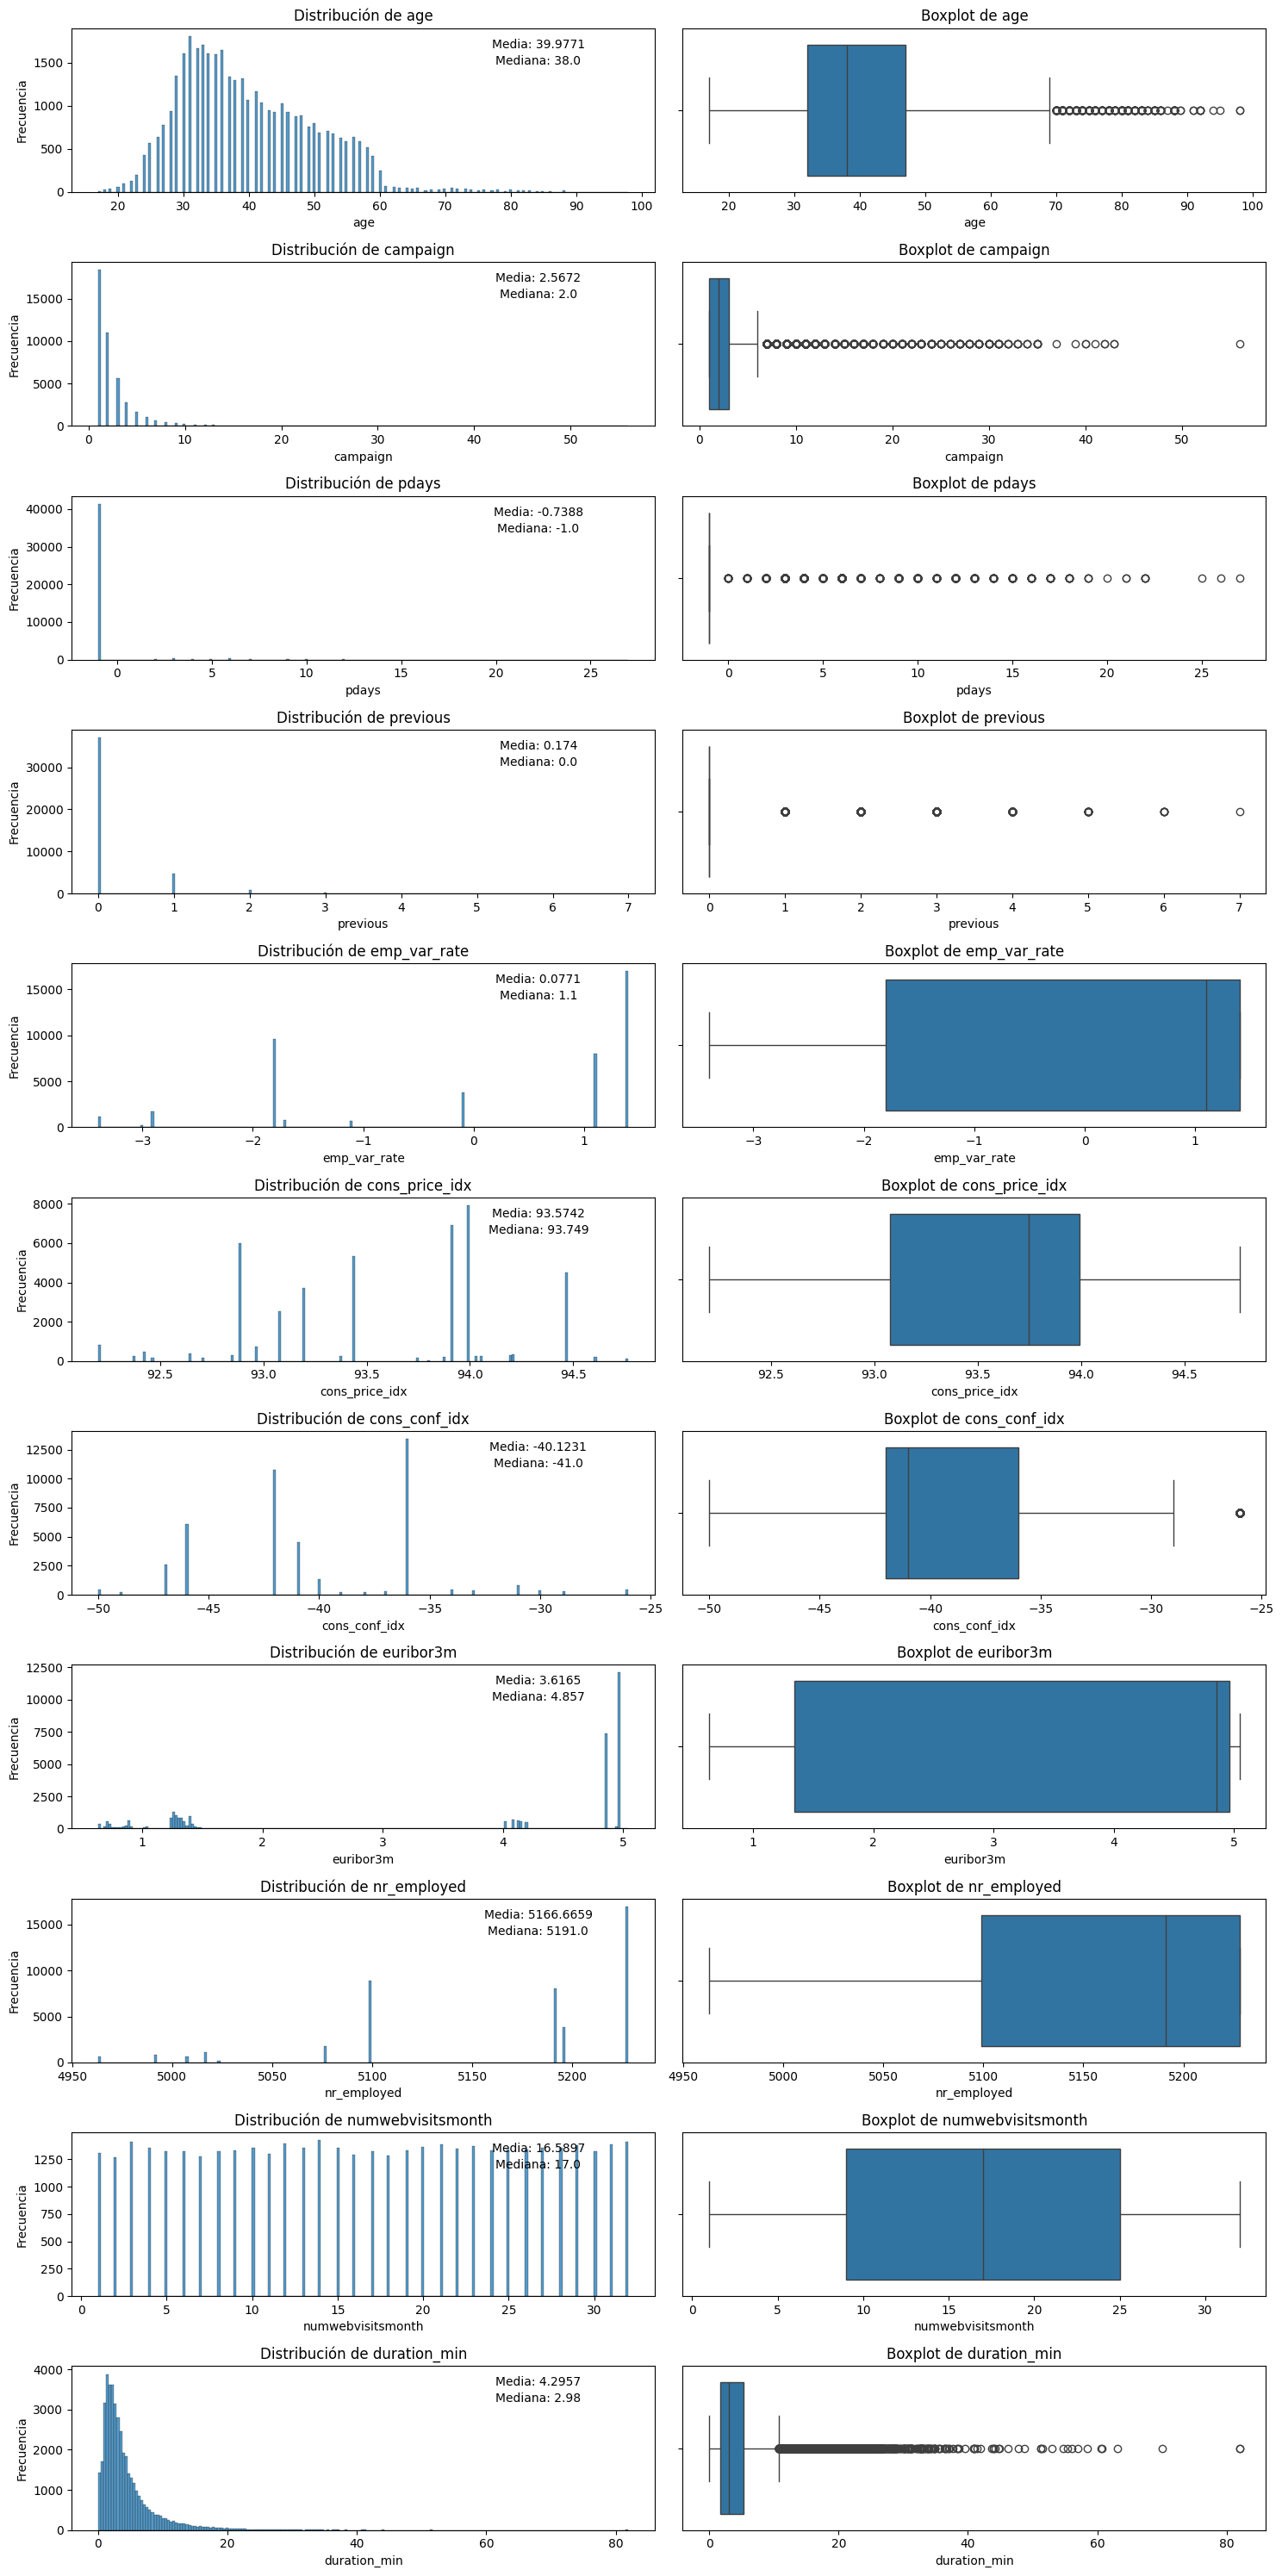

In [6]:
vis.subplot_col_num(df, col_num)

In [7]:
#Columnas con outliers
dict_outliers = {'age': 60,
                 'duration_min': 15,
                 'campaign': 6.5,
                 'previous': 0.5,
                 'cons_conf_idx': -28,
                 'pdays': -0.5}

In [8]:
for col, out in dict_outliers.items():
    outliers = df[col][df[col] > out].count()
    print (f'Para la columna {col.upper()} tenemos {outliers} outliers, lo que supone un {round(outliers/df.shape[0]*100, 3)}% de los datos')


Para la columna AGE tenemos 846 outliers, lo que supone un 1.967% de los datos
Para la columna DURATION_MIN tenemos 1325 outliers, lo que supone un 3.081% de los datos
Para la columna CAMPAIGN tenemos 2504 outliers, lo que supone un 5.823% de los datos
Para la columna PREVIOUS tenemos 5897 outliers, lo que supone un 13.714% de los datos
Para la columna CONS_CONF_IDX tenemos 477 outliers, lo que supone un 1.109% de los datos
Para la columna PDAYS tenemos 1588 outliers, lo que supone un 3.693% de los datos


## Análisis de las columnas de tipo fecha

In [9]:
col_date = ['contact_year', 'contact_month', 'customer_year','customer_month']

In [10]:
df[col_date].describe().T

,count,mean,std,min,25%,50%,75%,max
contact_year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
contact_month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000
customer_year,43000.0000,2012.8615,0.8795,2012.0000,2012.0000,2013.0000,2014.0000,2014.0000
customer_month,43000.0000,6.5218,3.4471,1.0000,4.0000,7.0000,10.0000,12.0000


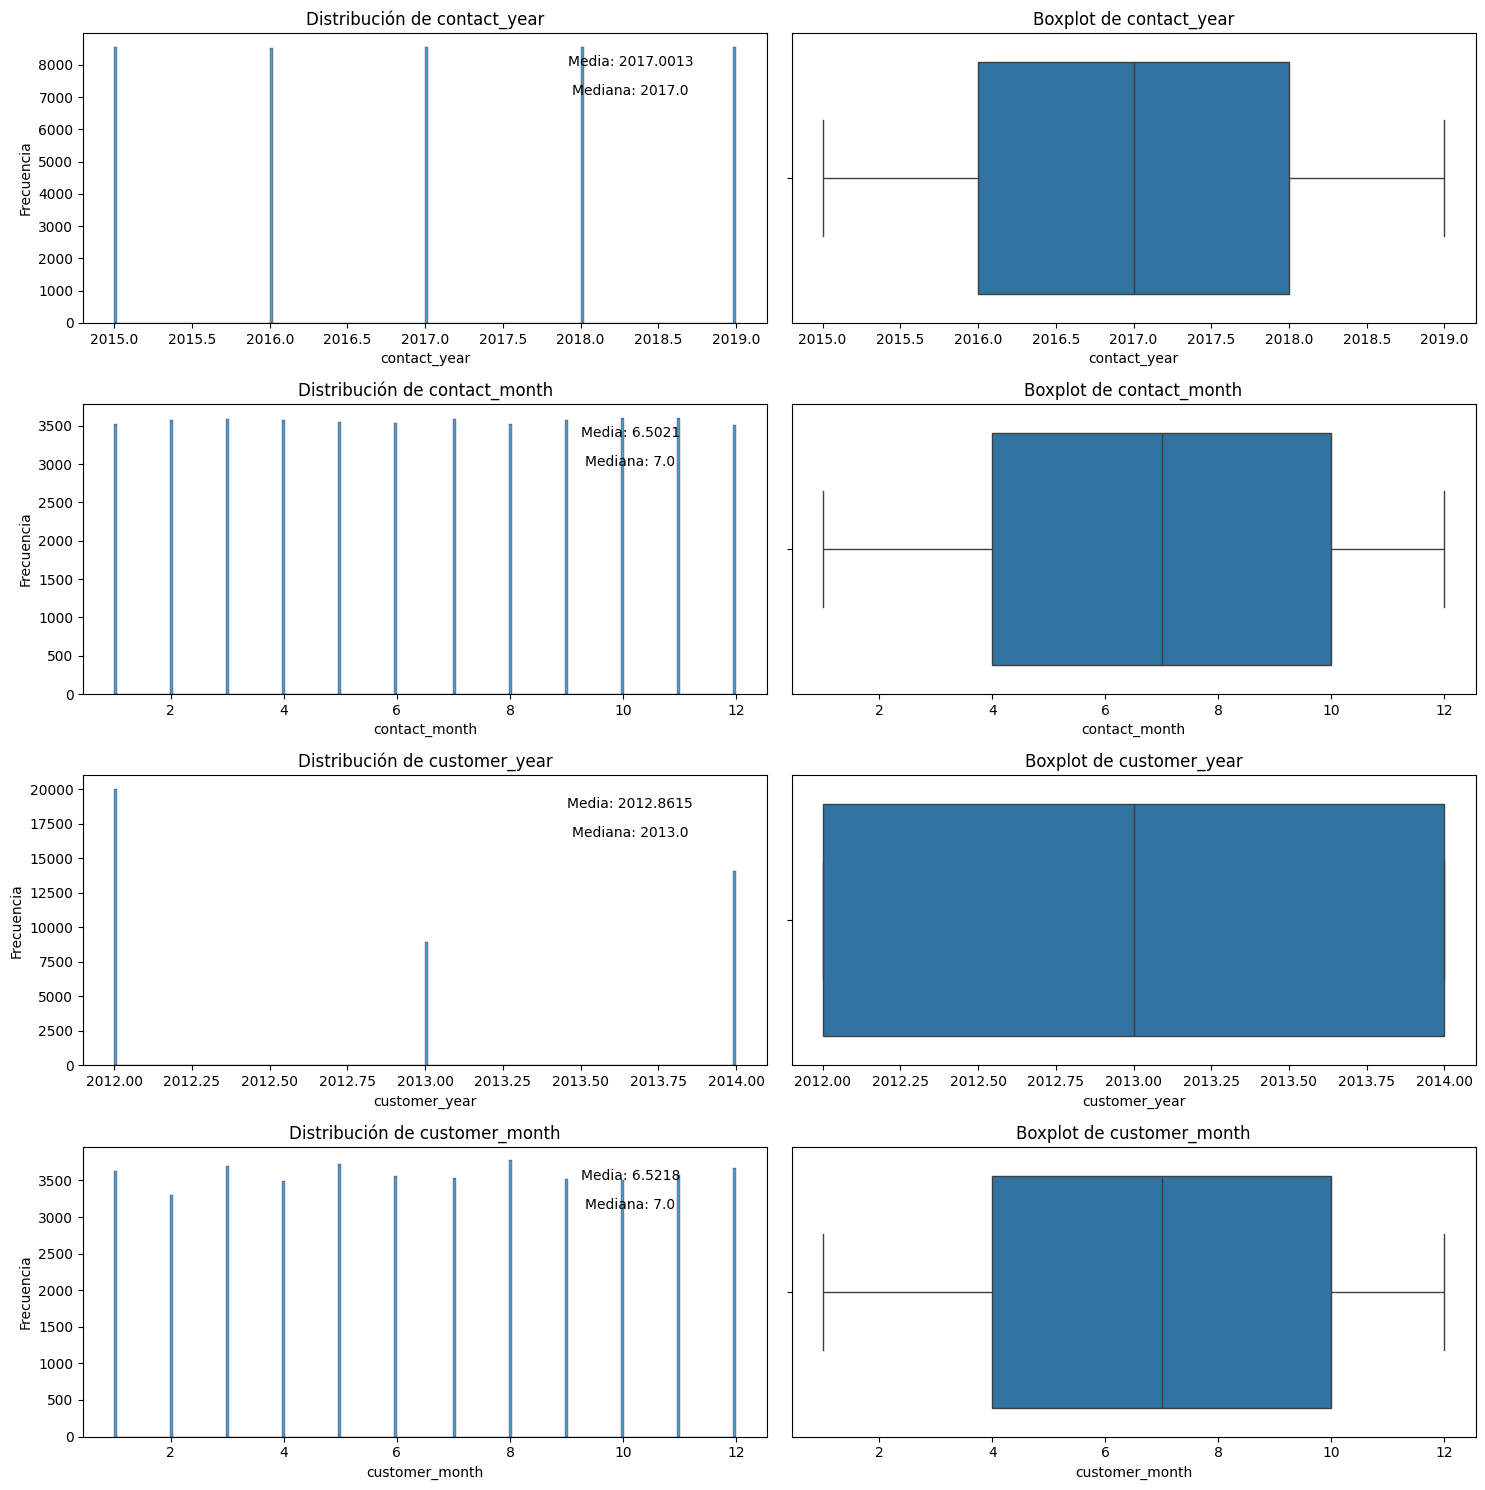

In [11]:
vis.subplot_col_num(df, col_date)

## Gestión de nulos

In [12]:
df_num = df.select_dtypes(include=np.number).copy()
            
col_high_umbral, col_low_umbral = an.visualizar_nulos_numericos(df_num, umbral_pct_null=5)

,Columns,DataType,Num_nulls,%_null,Change_value,Media,Mediana
0,age,float64,5120,11.9070,False,39.9771,38.0000
1,cons_price_idx,float64,471,1.0953,True,93.5742,93.7490
2,euribor3m,float64,9256,21.5256,False,3.6165,4.8570
3,contact_year,float64,248,0.5767,True,2017.0013,2017.0000
4,contact_month,float64,248,0.5767,True,6.5021,7.0000


## Gestionamos nulos con porcentaje de nulos inferior al umbral
   - El umbral establecido es 5%
   - El método para rellenar los nulos va a ser fillna()

In [13]:
df_nulls = df.fillna(
    {
        "cons_price_idx": df["cons_price_idx"].mean(),
        "contact_year": df["contact_year"].median(),
        "contact_month": df["contact_month"].median() 
    }    
)

In [14]:
an.calcular_nulos(df_nulls[col_low_umbral])[0]

cons_price_idx    0
contact_year      0
contact_month     0
dtype: int64

In [15]:
#Comprobamos como cambian los estadísticos al rellenar los nulos
#Describe del df nuevo
df_nulls[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_price_idx,43000.0000,93.5742,0.5764,92.2010,93.0750,93.5742,93.9940,94.7670
contact_year,43000.0000,2017.0013,1.4102,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
contact_month,43000.0000,6.5049,3.4390,1.0000,4.0000,7.0000,9.0000,12.0000


In [16]:
#Describe del df con el que trabajo
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_price_idx,42529.0000,93.5742,0.5795,92.2010,93.0750,93.7490,93.9940,94.7670
contact_year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
contact_month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000


Comprobamos cambios mínimos en los estadísticos. Procedemos a gestionar los nulos de nuestro df, con el que estamos trabajando

In [17]:
df = df.fillna(
    {
        "cons_price_idx": df["cons_price_idx"].mean(),
        "contact_year": df["contact_year"].median(),
        "contact_month": df["contact_month"].median() 
    }    
)

In [18]:
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_price_idx,43000.0000,93.5742,0.5764,92.2010,93.0750,93.5742,93.9940,94.7670
contact_year,43000.0000,2017.0013,1.4102,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
contact_month,43000.0000,6.5049,3.4390,1.0000,4.0000,7.0000,9.0000,12.0000


## Gestionamos nulos con porcentaje de nulos superior al umbral
   - El umbral establecido es 5%
   - El método para rellenar los nulos va a ser iterativeimputer

In [19]:
df, col_iterative = an.imputar_iterative(df, col_high_umbral)

,count,mean,std,min,25%,50%,75%,max
age_iterative,43000.0000,39.9769,9.7969,17.0000,33.0000,39.8324,46.0000,98.0000
euribor3m_iterative,43000.0000,3.6165,1.5389,0.6340,1.4660,4.0760,4.9590,5.0450


In [20]:
df, col_knn = an.imputar_knn(df, col_high_umbral)

,count,mean,std,min,25%,50%,75%,max
age_knn,43000.0000,39.8851,9.9184,17.0000,32.0000,39.0000,46.0000,98.0000
euribor3m_knn,43000.0000,3.5937,1.5917,0.6340,1.4350,4.2088,4.9590,5.0450


In [21]:
df[col_high_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
euribor3m,33744.0000,3.6165,1.7371,0.6340,1.3440,4.8570,4.9610,5.0450


In [22]:
col_imputadas = col_iterative + col_knn + col_high_umbral
df[col_imputadas].describe().sort_index(axis=1).T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
age_iterative,43000.0000,39.9769,9.7969,17.0000,33.0000,39.8324,46.0000,98.0000
age_knn,43000.0000,39.8851,9.9184,17.0000,32.0000,39.0000,46.0000,98.0000
euribor3m,33744.0000,3.6165,1.7371,0.6340,1.3440,4.8570,4.9610,5.0450
euribor3m_iterative,43000.0000,3.6165,1.5389,0.6340,1.4660,4.0760,4.9590,5.0450
euribor3m_knn,43000.0000,3.5937,1.5917,0.6340,1.4350,4.2088,4.9590,5.0450


In [23]:
# Después de comprobar los estadísticos, eliminamos las columnas con nulos.
col_eliminar = col_iterative + col_high_umbral
df.drop(columns=col_eliminar, inplace = True)

In [24]:
#Guardamos avances
df.to_csv("../data/data-clean.csv", index=False)